In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
# Data Cleaning

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# Changing columns name for more consistent and readable
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
# Left side index  | Right side object
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
# Changing all objects name
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [12]:
## Exploratory data analysis

In [13]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

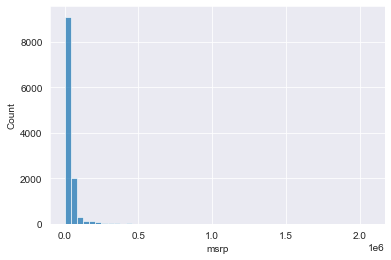

In [15]:
# bins is how many bars we actually have
sns.histplot(df.msrp, bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

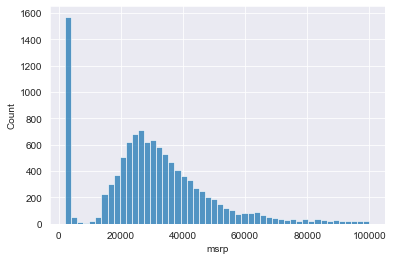

In [16]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [17]:
np.log([1, 10, 1000, 100000])
# np.log1p([0, 1, 10, 1000, 10000])  # Adding +1 to each index

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [18]:
price_logs  = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

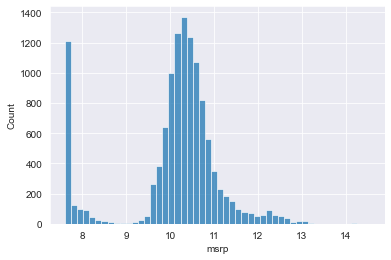

In [19]:
sns.histplot(price_logs, bins=50)    # Normal Dıstribution

In [20]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [21]:
n = len(df)

n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - n_val - n_test

In [22]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [23]:
n

11914

In [24]:
idx = np.arange(n)

In [25]:
np.random.seed(2)
np.random.shuffle(idx)


In [26]:
# Separate the dataset
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [27]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [28]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [29]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [30]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [31]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [32]:
len(y_train)

7150

In [33]:
# Linear Regression

In [34]:
# g(X) ~ y

In [35]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 7557, dtype: object

In [36]:
xi = [453, 11, 86]

In [37]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [38]:
# Basic Linear Regression
def linear_regression(xi):
    n=len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred


In [39]:
linear_regression(xi)

12.312

In [40]:
# Predicted selling price of car
# m1 = minus 1
np.expm1(12.312)

222347.2221101062

In [41]:
np.log1p(222347.2221101062)

12.312

In [42]:
# Linear regression vector form

In [43]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [44]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [45]:
w_new = [w0] + w

In [46]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [47]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [48]:
linear_regression(xi)

12.312

In [49]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [50]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [51]:
def linear_regression(X):
    return X.dot(w_new)

In [52]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training a linear regression model

In [53]:
def train_linear_regression(X, y):
    pass

In [54]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [55]:
# W = (X.T * X)^-1 * X.T * y

In [56]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
X = np.column_stack([ones, X])

In [58]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]


In [59]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [60]:
w0 = w_full[0]
w= w_full[1:]
w0, w

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [61]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [62]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [63]:
train_linear_regression(X, y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

# Car price baseline model

In [64]:
# we will use numerical columns. They will be our futures
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [65]:
base = ['engine_hp', 'engine_cylinders',
       'highway_mpg', 'city_mpg', 'popularity']

In [66]:
X_train = df_train[base].values

In [67]:
df_train[base].isnull().sum() # We have some missing values

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [68]:
df_train[base].fillna(0).isnull().sum() # Filling with zero

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [69]:
X_train = df_train[base].fillna(0).values

In [70]:
w0, w = train_linear_regression(X_train, y_train)

In [71]:
w0

7.927257388070117

In [72]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

In [73]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

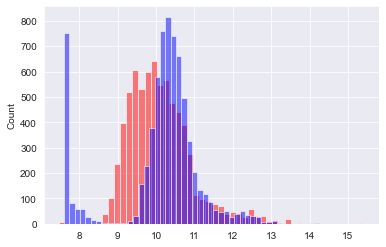

In [74]:
sns.histplot(y_pred, color ='red', bins=50, alpha=0.5) # PREDICTIONS
sns.histplot(y_train, color = 'blue', bins=50, alpha=0.5) # TARGET

# Root Mean Squared Error (RMSE)

In [75]:
# sqrt((1/m)∑(g(xi)-yi)^2)

In [76]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [77]:
rmse(y_train, y_pred)

0.7554192603920132

# Validating the model

In [78]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [79]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7616530991301601

# Simple feature engineering

In [80]:
2017 - df_train.year

2735      9
6720      5
5878      1
11190    26
4554      0
         ..
434       2
1902      2
9334      2
5284      3
2420      0
Name: year, Length: 7150, dtype: int64

In [81]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [82]:
# Train part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058335

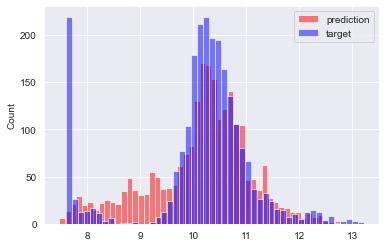

In [83]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

# Categorical variables

In [84]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [85]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [86]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

25.15634676907305

In [87]:
w0, w


(-1892716650172647.0,
 array([-1.25979400e-01, -4.11769415e+00, -1.49135423e+00, -1.20091264e+00,
        -1.87328446e-03, -1.15204727e+00, -1.38350480e+03, -1.39334362e+03,
        -1.39351243e+03,  9.15554192e-01,  2.06949015e+00, -3.70946478e+00,
        -3.60208641e+01, -7.60809203e-01,  6.99211474e+00,  4.21527311e+01,
         9.08207080e+00,  3.58850527e+00,  2.21686135e+02, -2.79986339e+01,
        -1.66096998e+01, -1.53650629e+01, -3.19971147e+01, -2.92630679e+01,
         1.89271665e+15,  1.89271665e+15,  1.89271665e+15,  1.89271665e+15,
        -8.15147229e-01, -3.70773744e+00, -9.46407895e+00, -9.25611606e+00,
        -2.25503056e+00, -6.31499991e+01, -4.61500750e+01, -4.20902831e+01,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

# Regularization

In [88]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [89]:
y= [1, 2, 3, 1, 2, 3]

In [90]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [91]:
XTX_inv = np.linalg.inv(XTX)


In [92]:
XTX_inv

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [93]:
XTX_inv.dot(X.T).dot(y)

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

In [94]:
xi = [453, 11, 86]

In [95]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [96]:
# Basic Linear Regression
def linear_regression(xi):
    n=len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred


In [97]:
linear_regression(xi)

12.312

In [98]:
# Predicted selling price of car
# m1 = minus 1
np.expm1(12.312)

222347.2221101062

In [99]:
np.log1p(222347.2221101062)

12.312

In [100]:
# Linear regression vector form

In [101]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [102]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [103]:
w_new = [w0] + w

In [104]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [105]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [106]:
linear_regression(xi)

12.312

In [107]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [108]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [109]:
def linear_regression(X):
    return X.dot(w_new)

In [110]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training a linear regression model

In [111]:
def train_linear_regression(X, y):
    pass

In [112]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [113]:
# W = (X.T * X)^-1 * X.T * y

In [114]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [115]:
X = np.column_stack([ones, X])

In [116]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]


In [117]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [118]:
w0 = w_full[0]
w= w_full[1:]
w0, w

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [119]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [120]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [121]:
train_linear_regression(X, y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

# Car price baseline model

In [122]:
# we will use numerical columns. They will be our futures
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [123]:
base = ['engine_hp', 'engine_cylinders',
       'highway_mpg', 'city_mpg', 'popularity']

In [124]:
X_train = df_train[base].values

In [125]:
df_train[base].isnull().sum() # We have some missing values

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [126]:
df_train[base].fillna(0).isnull().sum() # Filling with zero

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [127]:
X_train = df_train[base].fillna(0).values

In [128]:
w0, w = train_linear_regression(X_train, y_train)

In [129]:
w0

7.927257388070117

In [130]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

In [131]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

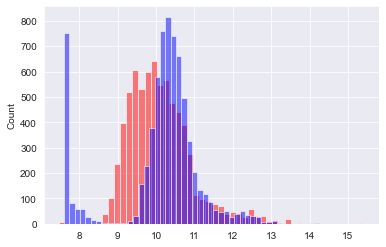

In [132]:
sns.histplot(y_pred, color ='red', bins=50, alpha=0.5) # PREDICTIONS
sns.histplot(y_train, color = 'blue', bins=50, alpha=0.5) # TARGET

# Root Mean Squared Error (RMSE)

In [133]:
# sqrt((1/m)∑(g(xi)-yi)^2)

In [134]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [135]:
rmse(y_train, y_pred)

0.7554192603920132

# Validating the model

In [136]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [137]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7616530991301601

# Simple feature engineering

In [138]:
2017 - df_train.year

2735      9
6720      5
5878      1
11190    26
4554      0
         ..
434       2
1902      2
9334      2
5284      3
2420      0
Name: year, Length: 7150, dtype: int64

In [139]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [140]:
# Train part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058335

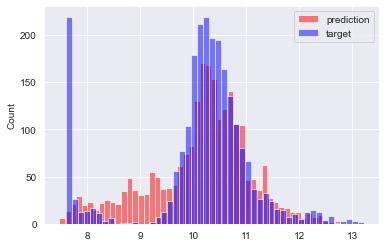

In [141]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

# Categorical variables

In [142]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [143]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [144]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

25.15634676907305

In [145]:
w0, w


(-1892716650172647.0,
 array([-1.25979400e-01, -4.11769415e+00, -1.49135423e+00, -1.20091264e+00,
        -1.87328446e-03, -1.15204727e+00, -1.38350480e+03, -1.39334362e+03,
        -1.39351243e+03,  9.15554192e-01,  2.06949015e+00, -3.70946478e+00,
        -3.60208641e+01, -7.60809203e-01,  6.99211474e+00,  4.21527311e+01,
         9.08207080e+00,  3.58850527e+00,  2.21686135e+02, -2.79986339e+01,
        -1.66096998e+01, -1.53650629e+01, -3.19971147e+01, -2.92630679e+01,
         1.89271665e+15,  1.89271665e+15,  1.89271665e+15,  1.89271665e+15,
        -8.15147229e-01, -3.70773744e+00, -9.46407895e+00, -9.25611606e+00,
        -2.25503056e+00, -6.31499991e+01, -4.61500750e+01, -4.20902831e+01,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

# Regularization

In [146]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [147]:
y= [1, 2, 3, 1, 2, 3]

In [148]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [149]:
XTX_inv = np.linalg.inv(XTX)


In [150]:
XTX_inv

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [151]:
XTX_inv.dot(X.T).dot(y)

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

In [153]:
XTX = [
    [1., 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]
XTX = np.array(XTX)

In [154]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [160]:
XTX = XTX + 0.01 * np.eye(3)

In [161]:
np.linalg.inv(XTX)

array([[-1.5898086 ,  1.05285334,  1.05285334],
       [ 1.05285334, -0.04149481, -1.02188707],
       [ 1.05285334, -1.02188707, -0.04149481]])

In [163]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [172]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r= 0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.460820828598571

# Tuning the model

for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r= r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)

In [174]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r= r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4608158583623801

# Using the model

In [175]:
df_full_train = pd.concat([df_train, df_val])

In [177]:
df_full_train.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [178]:
X_full_train = prepare_X(df_full_train)

In [179]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [181]:
y_full_train = np.concatenate([y_train, y_val])

In [182]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r= 0.001)

In [183]:
w

array([ 1.80193317e-03,  1.26575152e-01, -6.78607910e-03,  7.75903922e-03,
       -5.33226049e-05, -9.73063836e-02, -1.27241622e+00, -1.30599191e+00,
       -9.95969567e-01, -6.27479232e-02,  1.82139250e-01,  2.83073958e-02,
        1.29063750e-02, -1.32624474e-01, -2.69110367e-01, -6.50985193e-01,
       -3.21721816e-01, -3.55424921e-01, -3.51215997e-01, -6.61059036e-01,
       -1.19526934e-01, -5.15904836e-01, -6.99730875e-01, -3.25276690e-01,
        1.80621883e+00,  1.75053253e+00,  1.82810503e+00,  1.78997349e+00,
       -5.47616418e-02,  1.19033259e-01, -2.65289024e-02,  7.42028834e-03,
       -7.49067156e-03,  2.42691853e+00,  2.35931699e+00,  2.38908620e+00,
       -1.47584145e-01, -2.46551739e-02,  1.81542645e-01,  3.55084073e-01,
       -2.79089708e-01])

In [184]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4600753968848744

In [186]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [187]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [189]:
X_small = prepare_X(df_small)

In [190]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.632492509928763

In [191]:
np.expm1(y_pred)       # Our predicted price

41459.33681987879

In [192]:
np.expm1(y_test[20])   # Real price

35000.00000000001